In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import file of US cities and matching counties
city_cty = pd.read_csv('../data/uscities.csv')

In [3]:
# Import file of US cities and matching counties
tx_sip_ctys = pd.read_csv('../data/sip_tx_ctys.csv')

In [4]:
city_cty.head(1)

,city,city_ascii,state_id,state_name,county_fips,county_name,county_fips_all,county_name_all,lat,lng,population,density,source,military,incorporated,timezone,ranking,zips,id
0,South Creek,South Creek,WA,Washington,53053,Pierce,53053,Pierce,46.9994,-122.3921,2500.0,125.0,polygon,False,True,America/Los_Angeles,3,98580 98387 98338,1840042075


In [5]:
city_cty.drop(columns=['city_ascii','county_fips_all','county_name_all','source','military','incorporated','timezone','zips','id'], inplace=True)

In [6]:

sip_list = []
for num in range(0,28889):
    if city_cty['state_id'][num] == 'NY':
        sip_list.append(1)
    elif city_cty['state_id'][num] == 'TX':
        if city_cty['county_name'][num] in tx_sip_ctys:
            sip_list.append(1)
        else:
            sip_list.append(0)
    else:
        sip_list.append(0)
city_cty['shelter_in_place'] = sip_list
    

In [7]:
city_cty['all_gatherings_prohibited'] = [1 if item == 'NY' else 0 for item in city_cty['state_id']]
city_cty['traveler_quarantines'] = [1 if item == 'TX' else 0 for item in city_cty['state_id']]
city_cty['temporary_hospitals'] = [1 if item == 'NY' else 0 for item in city_cty['state_id']]
city_cty['businesses_reopening'] = [1 if item == 'TX' else 0 for item in city_cty['state_id']]
city_cty['state_stay_at_home'] = [1 if item == 'NY' else 0 for item in city_cty['state_id']]
city_cty['tests_per_thousand'] = [61.9 if item == 'NY' else 18.1 for item in city_cty['state_id']]
city_cty['test_positives_rate'] = [.28 if item == 'NY' else .08 for item in city_cty['state_id']]

In [8]:
city_cty.head()

,city,state_id,state_name,county_fips,county_name,lat,lng,population,density,ranking,shelter_in_place,all_gatherings_prohibited,traveler_quarantines,temporary_hospitals,businesses_reopening,state_stay_at_home,tests_per_thousand,test_positives_rate
0,South Creek,WA,Washington,53053,Pierce,46.9994,-122.3921,2500.0,125.0,3,0,0,0,0,0,0,18.1,0.08
1,Roslyn,WA,Washington,53037,Kittitas,47.2507,-121.0989,947.0,84.0,3,0,0,0,0,0,0,18.1,0.08
2,Sprague,WA,Washington,53043,Lincoln,47.3048,-117.9713,441.0,163.0,3,0,0,0,0,0,0,18.1,0.08
3,Gig Harbor,WA,Washington,53053,Pierce,47.3352,-122.5968,9507.0,622.0,3,0,0,0,0,0,0,18.1,0.08
4,Lake Cassidy,WA,Washington,53061,Snohomish,48.0639,-122.0920,3591.0,131.0,3,0,0,0,0,0,0,18.1,0.08


In [9]:
tx_df = city_cty[city_cty['state_id'] == 'TX']
ny_df = city_cty[city_cty['state_id'] == 'NY']

In [10]:
df_client = pd.read_csv('../data/tweets_and_covid.csv')

/Users/SWDiamond/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,4,5,10,11,12,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df_client_ny = df_client[df_client['state'] == 'NY']
df_client_tx = df_client[df_client['state'] == 'TX']

In [12]:
df_client_ny.shape

(1305, 16)

In [13]:
ny_city_fix = {'Cheektowaga':'Buffalo',
               'Clarence':'Clarence Center',
               'Amherst':'Buffalo',
               'Henrietta':'Rochester',
               'Clifton Park':'Round Lake',
               'Delmar':'Albany',
               'Greece':'Rochester',
               'Halfmoon':'Mechanicville',
               'Huntington':'Huntington Bay',
               'Latham':'Colonie',
               'Oyster Bay':'Oyster Bay Cove', 
               'Poestenkill':'Averill Park',
               'Somers':"Golden's Bridge"}
tx_city_fix = {'Desoto':'Cedar Hill','Jollyville':'Austin'}

In [14]:
df_client_ny['city'] = df_client_ny['city'].replace(ny_city_fix)
df_client_tx['city'] = df_client_tx['city'].replace(tx_city_fix)

/Users/SWDiamond/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/SWDiamond/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_client_ny.head()

,screen_name,username,tweet_id,tweet_timestamp,text,hashtags,likes,retweets,replies,sentiment_score,state,city,date,cases,deaths,Unnamed: 15
4,ClinchAcademy,Luke Rinehart,1.255840e+18,4/30/20 12:53,"When you choose success, perseverance...master...","['covid_19', 'coronavirus', 'bjj', 'brazilianj...",0.0,0.0,0.0,0.300000,NY,Buffalo,4/30/20 0:00,304401.0,18321.0,False
5,nerdinformants,Nerd Informants,1.256210e+18,5/1/20 13:28,Movie theaters in Norway will reopen on May 7 ...,[],0.0,0.0,0.0,-0.126852,NY,Buffalo,5/1/20 0:00,308345.0,18610.0,False
6,mostrecently,Johannes Jüngst,1.256960e+18,5/3/20 14:35,In between green and blue #frankfurtammain #fr...,"['frankfurtammain', 'frankfurt', 'badhomburg',...",0.0,0.0,0.0,-0.100000,NY,Buffalo,5/3/20 0:00,316446.0,19189.0,False
7,FranconiaMN,Franconia Sculpture Park,1.256630e+18,5/2/20 16:48,The Franconia Art & Farmers Market starts tomo...,[],0.0,0.0,0.0,-0.291667,NY,Amityville,5/2/20 0:00,313008.0,18909.0,False
10,MortgageDelGuy,MortgageDeliveryGuy - Paramjit S. Girn,1.257370e+18,5/4/20 17:56,https://bit.ly/3eUhoC5 \nAmid #covid19 pandemi...,['covid19'],0.0,0.0,0.0,-0.100000,NY,Armonk,5/4/20 0:00,318984.0,19415.0,False


In [16]:
merge_ny = pd.merge(df_client_ny, ny_df, on='city')
merge_tx = pd.merge(df_client_tx, tx_df, on='city')

In [17]:
merge_tx.head(2)

,screen_name,username,tweet_id,tweet_timestamp,text,hashtags,likes,retweets,replies,sentiment_score,...,density,ranking,shelter_in_place,all_gatherings_prohibited,traveler_quarantines,temporary_hospitals,businesses_reopening,state_stay_at_home,tests_per_thousand,test_positives_rate
0,nigeriatunes,Number 1 Agbero.,1.257120e+18,5/4/20 1:38,"Cross River preparing for life after COVID-19,...",['Nigeriatunes'],0.0,1.0,0.0,0.0,...,441.0,2,0,0,1,0,1,0,18.1,0.08
1,WBOP,Victor Zimmerman,1.256750e+18,5/3/20 0:57,Reminder! Gov. Baker announced that the state’...,"['cityofboston', 'wbop', 'curfew', 'stayhome',...",0.0,0.0,0.0,0.0,...,1365.0,3,0,0,1,0,1,0,18.1,0.08


In [18]:
merge_tx.columns

Index(['screen_name', 'username', 'tweet_id', 'tweet_timestamp', 'text',
       'hashtags', 'likes', 'retweets', 'replies', 'sentiment_score', 'state',
       'city', 'date', 'cases', 'deaths', 'Unnamed: 15', 'state_id',
       'state_name', 'county_fips', 'county_name', 'lat', 'lng', 'population',
       'density', 'ranking', 'shelter_in_place', 'all_gatherings_prohibited',
       'traveler_quarantines', 'temporary_hospitals', 'businesses_reopening',
       'state_stay_at_home', 'tests_per_thousand', 'test_positives_rate'],
      dtype='object')

In [19]:
tweets_covid_cty_info = pd.concat([merge_ny,merge_tx], axis=0)

In [20]:
tweets_covid_cty_info.head(5)

,screen_name,username,tweet_id,tweet_timestamp,text,hashtags,likes,retweets,replies,sentiment_score,...,density,ranking,shelter_in_place,all_gatherings_prohibited,traveler_quarantines,temporary_hospitals,businesses_reopening,state_stay_at_home,tests_per_thousand,test_positives_rate
0,ClinchAcademy,Luke Rinehart,1.255840e+18,4/30/20 12:53,"When you choose success, perseverance...master...","['covid_19', 'coronavirus', 'bjj', 'brazilianj...",0.0,0.0,0.0,0.300000,...,2472.0,2,1,1,0,1,0,1,61.9,0.28
1,nerdinformants,Nerd Informants,1.256210e+18,5/1/20 13:28,Movie theaters in Norway will reopen on May 7 ...,[],0.0,0.0,0.0,-0.126852,...,2472.0,2,1,1,0,1,0,1,61.9,0.28
2,mostrecently,Johannes Jüngst,1.256960e+18,5/3/20 14:35,In between green and blue #frankfurtammain #fr...,"['frankfurtammain', 'frankfurt', 'badhomburg',...",0.0,0.0,0.0,-0.100000,...,2472.0,2,1,1,0,1,0,1,61.9,0.28
3,TheHakeReport,The Hake Report,1.255200e+18,4/28/20 18:27,Corona an Excuse to Steal Freedom (Tue. 4/28/2...,[],3.0,3.0,1.0,-0.050000,...,2472.0,2,1,1,0,1,0,1,61.9,0.28
4,audreyfrenchsmi,Audrey Boulanger,1.255240e+18,4/28/20 21:00,I think you get the idea \n.\n.\n#wine #funny...,"['wine', 'funny', 'covid19', 'coronavirus', 'j...",0.0,0.0,1.0,0.275000,...,2472.0,2,1,1,0,1,0,1,61.9,0.28


In [21]:
tweets_covid_cty_info.groupby('ranking')['density'].min()

ranking
1    1144.0
2     291.0
3      77.0
Name: density, dtype: float64

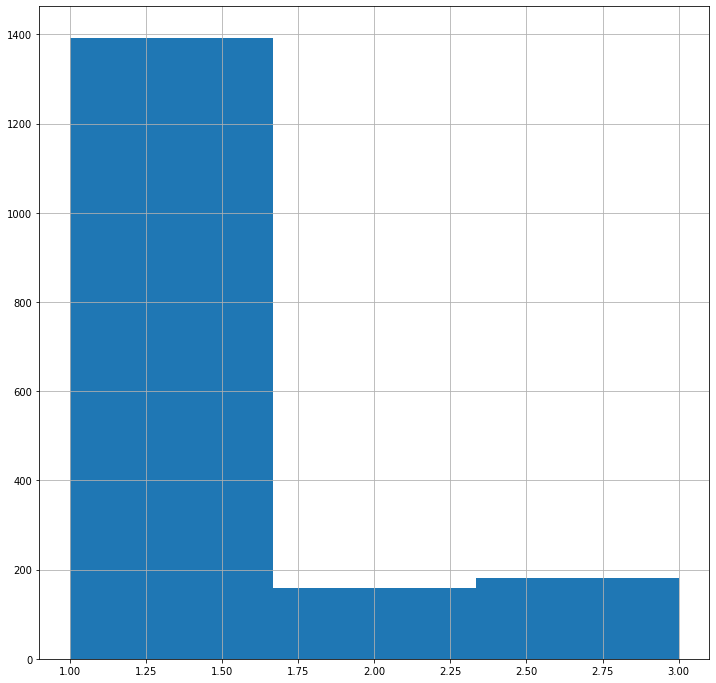

In [22]:
tweets_covid_cty_info['ranking'].hist(figsize=(12,12),bins=3);

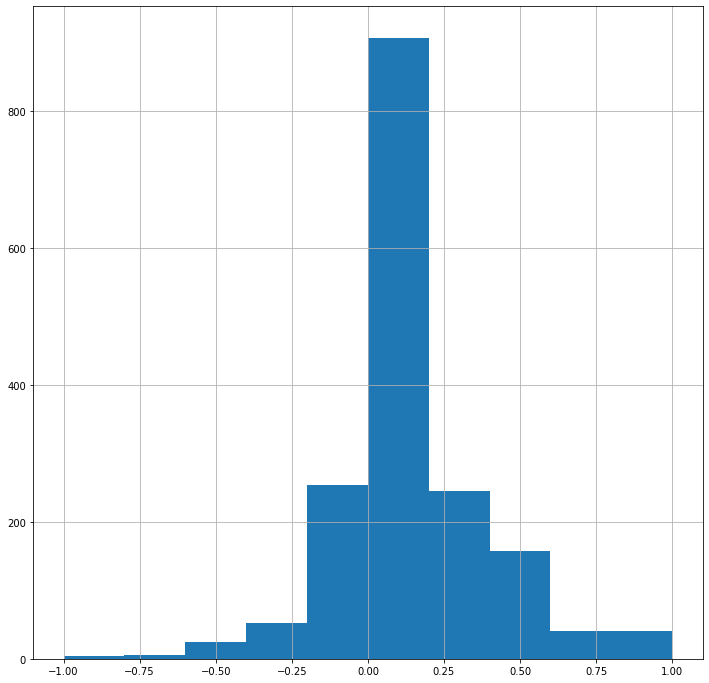

In [23]:
tweets_covid_cty_info['sentiment_score'].hist(figsize=(12,12));

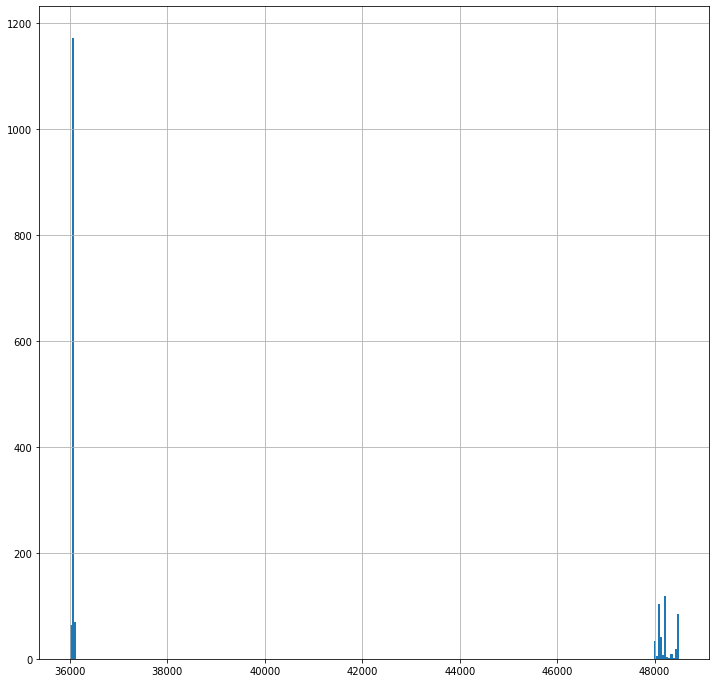

In [24]:
tweets_covid_cty_info['county_fips'].hist(figsize=(12,12),bins=300);

In [25]:
tweets_covid_cty_info.to_csv(r'../data/tweets_covid_cty_info.csv')

In [26]:
pd.set_option('display.max_columns', None)

In [27]:
tweets_covid_cty_info[tweets_covid_cty_info['username'] == 'Neil Ellis']

,screen_name,username,tweet_id,tweet_timestamp,text,hashtags,likes,retweets,replies,sentiment_score,state,city,date,cases,deaths,Unnamed: 15,state_id,state_name,county_fips,county_name,lat,lng,population,density,ranking,shelter_in_place,all_gatherings_prohibited,traveler_quarantines,temporary_hospitals,businesses_reopening,state_stay_at_home,tests_per_thousand,test_positives_rate
206,neilellis,Neil Ellis,1.255650e+18,4/30/20 0:06,"US\n\n#Covid19: Under control, and improving ...",['Covid19'],0.0,0.0,1.0,-0.400000,NY,Fulton,4/30/20 0:00,304401.0,18321.0,False,NY,New York,36075,Oswego,43.3171,-76.4162,11324.0,1144.0,3,1,1,0,1,0,1,61.9,0.28
292,neilellis,Neil Ellis,1.255280e+18,4/28/20 23:23,"United Kingdom\n\n#Covid19: Under control, an...",['Covid19'],0.0,0.0,1.0,-0.400000,NY,Manhattan,4/28/20 0:00,295137.0,17638.0,False,NY,New York,36061,New York,40.7834,-73.9662,1643734.0,27799.0,1,1,1,0,1,0,1,61.9,0.28
293,neilellis,Neil Ellis,1.255280e+18,4/28/20 23:24,"US\n\n#Covid19: Under control, and improving ...",['Covid19'],0.0,0.0,1.0,-0.400000,NY,Manhattan,4/28/20 0:00,295137.0,17638.0,False,NY,New York,36061,New York,40.7834,-73.9662,1643734.0,27799.0,1,1,1,0,1,0,1,61.9,0.28
312,neilellis,Neil Ellis,1.255400e+18,4/29/20 7:26,"United Kingdom\n\n#Covid19: Under control, an...",['Covid19'],0.0,0.0,1.0,-0.400000,NY,Manhattan,4/29/20 0:00,299722.0,18015.0,False,NY,New York,36061,New York,40.7834,-73.9662,1643734.0,27799.0,1,1,1,0,1,0,1,61.9,0.28
473,neilellis,Neil Ellis,1.255900e+18,4/30/20 16:51,"United Kingdom\n\n#Covid19: Under control, an...",['Covid19'],0.0,0.0,1.0,-0.400000,NY,Manhattan,4/30/20 0:00,304401.0,18321.0,False,NY,New York,36061,New York,40.7834,-73.9662,1643734.0,27799.0,1,1,1,0,1,0,1,61.9,0.28
1110,neilellis,Neil Ellis,1.257470e+18,5/5/20 0:24,"US\n\n#Covid19: Under control, and improving ...",['Covid19'],0.0,0.0,1.0,-0.400000,NY,Port Washington,5/5/20 0:00,321276.0,19645.0,False,NY,New York,36059,Nassau,40.8267,-73.6764,16034.0,1479.0,3,1,1,0,1,0,1,61.9,0.28
1142,neilellis,Neil Ellis,1.255770e+18,4/30/20 8:09,United Kingdom\n\n#Covid19: Slow spreading an...,['Covid19'],0.0,0.0,1.0,-0.350000,NY,Queens,4/30/20 0:00,304401.0,18321.0,False,NY,New York,36081,Queens,40.7498,-73.7976,2333054.0,8247.0,1,1,1,0,1,0,1,61.9,0.28
67,neilellis,Neil Ellis,1.257470e+18,5/5/20 0:24,"US\n\n#Covid19: Under control, and improving ...",['Covid19'],0.0,0.0,1.0,-0.400000,TX,Austin,5/5/20 0:00,34283.0,955.0,False,TX,Texas,48453,Travis,30.3006,-97.7517,1638716.0,1144.0,1,0,0,1,0,1,0,18.1,0.08
138,neilellis,Neil Ellis,1.257470e+18,5/5/20 0:21,"New Zealand\n\n#Covid19: Under control, and i...",['Covid19'],0.0,0.0,1.0,-0.431818,TX,Dallas,5/5/20 0:00,34283.0,955.0,False,TX,Texas,48113,Dallas,32.7936,-96.7662,5733259.0,1524.0,1,0,0,1,0,1,0,18.1,0.08
140,neilellis,Neil Ellis,1.257470e+18,5/5/20 0:24,"US\n\n#Covid19: Under control, and improving ...",['Covid19'],0.0,0.0,1.0,-0.400000,TX,Dallas,5/5/20 0:00,34283.0,955.0,False,TX,Texas,48113,Dallas,32.7936,-96.7662,5733259.0,1524.0,1,0,0,1,0,1,0,18.1,0.08


In [28]:
apple = pd.read_csv('../data/applemobilitytrends_2020_05_10.csv')

In [29]:
apple[apple['region'] == "Texas"]

,geo_type,region,transportation_type,alternative_name,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,2020-01-21,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02,2020-02-03,2020-02-04,2020-02-05,2020-02-06,2020-02-07,2020-02-08,2020-02-09,2020-02-10,2020-02-11,2020-02-12,2020-02-13,2020-02-14,2020-02-15,2020-02-16,2020-02-17,2020-02-18,2020-02-19,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20,2020-04-21,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07,2020-05-08,2020-05-09,2020-05-10
1078,sub-region,Texas,driving,NaN,100.0,102.47,104.35,107.19,124.73,120.87,89.42,101.07,102.99,99.24,106.38,126.85,122.04,84.18,99.03,99.64,100.96,105.27,125.67,124.39,83.6,98.96,101.6,93.07,106.34,126.41,126.41,86.79,101.32,102.89,107.8,119.75,147.05,132.12,99.7,108.72,107.64,107.89,112.02,136.89,135.54,93.13,106.59,112.85,113.29,126.01,145.68,144.05,98.81,108.82,113.67,110.31,123.05,147.49,140.85,100.03,112.58,119.28,119.4,117.43,121.78,107.51,77.1,87.43,80.33,77.37,74.36,75.34,62.05,46.97,62.29,61.89,55.65,57.44,63.41,53.73,43.68,52.45,57.08,58.18,56.06,60.73,48.75,41.7,54.32,57.67,58.92,59.79,66.74,55.72,40.45,59.2,60.87,66.09,68.06,73.25,66.55,51.55,67.93,67.65,66.02,74.07,83.02,76.43,60.99,71.27,71.83,74.8,80.32,94.65,88.41,70.05,82.18,85.1,86.1,88.72,102.11,99.65,72.83


In [30]:
columns_list = ['geo_type','region','transportation_type','alternative_name','2020-04-28','2020-04-29','2020-04-30','2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06']
rows_list = [173,174,175,245,246,247,248,249,250,301,302,303,406,407,408,460,461,462,480,481,482,906,1078]

In [31]:
apple = apple.loc[rows_list,columns_list]

In [32]:
apple['region+type'] = apple['region'] + ' ' + apple['transportation_type']

In [33]:
apple['mean'] = (apple['2020-04-28']+apple['2020-04-29']+apple['2020-04-30']+apple['2020-05-01']+apple['2020-05-02']+apple['2020-05-03']+apple['2020-05-04']+apple['2020-05-05']+apple['2020-05-06'])/9

In [34]:
apple.tail()

,geo_type,region,transportation_type,alternative_name,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,region+type,mean
480,city,San Antonio,driving,NaN,71.89,73.99,77.76,90.86,81.66,64.31,79.48,83.73,82.97,San Antonio driving,78.516667
481,city,San Antonio,transit,NaN,44.92,46.49,45.63,50.32,44.50,43.27,48.61,49.07,49.32,San Antonio transit,46.903333
482,city,San Antonio,walking,NaN,68.31,74.29,75.59,87.02,83.10,62.45,77.90,81.40,79.01,San Antonio walking,76.563333
906,sub-region,New York,driving,NaN,61.28,57.35,56.89,67.63,73.04,62.45,62.43,67.45,63.65,New York driving,63.574444
1078,sub-region,Texas,driving,NaN,71.83,74.80,80.32,94.65,88.41,70.05,82.18,85.10,86.10,Texas driving,81.493333


In [35]:
apple2 = apple.loc[:,['region+type','mean']]

In [36]:
apple2

,region+type,mean
173,Austin driving,67.463333
174,Austin transit,38.030000
175,Austin walking,67.544444
245,Corpus Christi driving,105.376667
246,Corpus Christi transit,59.140000
247,Corpus Christi walking,108.345556
248,Dallas driving,77.040000
249,Dallas transit,49.845556
250,Dallas walking,83.725556
301,Houston driving,75.588889


In [37]:
final_df = pd.read_csv('../data/tweets_covid_and_policy.csv')

In [38]:
final_df.head(1)

,screen_name,username,tweet_id,timestamp,text,hashtags,likes,retweets,replies,sentiment_score,city,county_fips,density,county,state,county_cases,county_deaths,state_fips,state_cases,state_deaths,county_population,state_population,all_gatherings_prohibited,temporary_hospitals,state_stay_at_home,traveler_quarantines,businesses_reopening,tests_per_thousand,test_positives_rate,shelter_in_place
0,BillBodouva,Real Estate BuyerRep,1254996305082036224,2020-04-28 04:50:10,Happy Birthday Mom! You wouldn’t believe what...,"['bestmom', 'bestfriend', 'happybirthday', '1s...",0,0,0,0.313973,Sands Point,36059,265.0,Nassau,New York,35085.0,2039.0,36.0,295137.0,17638.0,1356924.0,19453561.0,1.0,1.0,1.0,0.0,0.0,61.9,0.28,1.0


In [39]:
final_df.describe()

,tweet_id,likes,retweets,replies,sentiment_score,county_fips,density,county_cases,county_deaths,state_fips,state_cases,state_deaths,county_population,state_population,all_gatherings_prohibited,temporary_hospitals,state_stay_at_home,traveler_quarantines,businesses_reopening,tests_per_thousand,test_positives_rate,shelter_in_place
count,1.727000e+03,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1.726000e+03,1.726000e+03,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000,1726.000000
mean,1.256496e+18,0.834395,0.205559,0.108280,0.113676,39013.839027,15809.987261,115462.333140,8613.494206,38.947856,242093.693511,14472.893975,6.159550e+06,2.179768e+07,0.754345,0.754345,0.754345,0.245655,0.245655,51.140324,0.230869,0.754345
std,8.239315e+14,6.967839,1.195304,1.117322,0.256718,5261.772928,12092.553797,77756.201188,6020.300151,5.167193,120799.222611,7830.409380,3.143429e+06,4.108918e+06,0.430599,0.430599,0.430599,0.430599,0.430599,18.860256,0.086120,0.430599
min,1.254996e+18,0.000000,0.000000,0.000000,-1.000000,36000.000000,77.000000,13.000000,0.000000,36.000000,26865.000000,738.000000,2.527400e+04,1.945356e+07,0.000000,0.000000,0.000000,0.000000,0.000000,18.100000,0.080000,0.000000
25%,1.255700e+18,0.000000,0.000000,0.000000,0.000000,36000.000000,1524.000000,6708.000000,129.000000,36.000000,295137.000000,17638.000000,2.635516e+06,1.945356e+07,1.000000,1.000000,1.000000,0.000000,0.000000,61.900000,0.280000,1.000000
50%,1.256564e+18,0.000000,0.000000,0.000000,0.000000,36000.000000,14606.000000,167489.000000,12514.000000,36.000000,308345.000000,18610.000000,8.336817e+06,1.945356e+07,1.000000,1.000000,1.000000,0.000000,0.000000,61.900000,0.280000,1.000000
75%,1.257310e+18,0.000000,0.000000,0.000000,0.246834,36119.000000,27799.000000,174341.000000,13064.000000,36.000000,316446.000000,19189.000000,8.336817e+06,1.945356e+07,1.000000,1.000000,1.000000,0.000000,0.000000,61.900000,0.280000,1.000000
max,1.257890e+18,244.000000,30.000000,39.000000,1.000000,48491.000000,27799.000000,183770.000000,18993.000000,48.000000,329405.000000,25956.000000,8.336817e+06,2.899588e+07,1.000000,1.000000,1.000000,1.000000,1.000000,61.900000,0.280000,1.000000


In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [41]:
# creating small addendum for stopwords 
stops = ['com', 'https', 'www','igshid', 'http', 'twitter','instagram']

In [42]:
# combining addendum with NLTK stopwords
all_stops = stopwords.words('english') + stops

In [43]:
# Instantiating and fitting CountVectorizer
cvec = CountVectorizer(lowercase=True, 
                       ngram_range = (1,1),
                       stop_words=(all_stops)
                       ) 

X_text = cvec.fit_transform(final_df['text'])

In [44]:
# creating dataframe of Count Vectorize words
X_text_df = pd.DataFrame(X_text.toarray(), 
                         columns=cvec.get_feature_names())


In [45]:
# create list of words and the total counts for each word
word_list = X_text_df.columns.tolist()
sum_list = [X_text_df[column].sum() for column in X_text_df.columns]

In [46]:
# building dataframe of words and counts
word_sums = pd.DataFrame()
word_sums['Word'] = word_list
word_sums['Count']  = sum_list

In [47]:
word_sums.sort_values('Count', ascending=False)

,Word,Count
4497,covid,724
4427,coronavirus,623
4498,covid19,531
283,19,522
4405,corona,196
...,...,...
4509,covid19partiiim4a,1
4510,covid19ph,1
4512,covid19prayers,1
4513,covid19response,1


In [48]:
#building top 30 list and visualizing
word_sums_30 = word_sums.sort_values('Count', ascending=False).head(30)

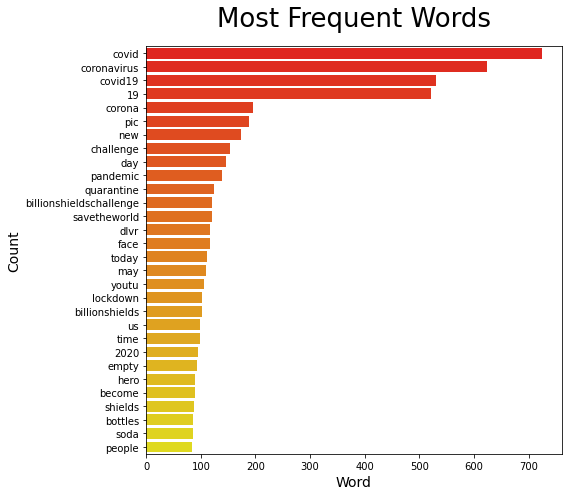

In [84]:
# establish figure and axes objects
fig = plt.figure(figsize=(8,7))
ax = plt.gca()

# supply ax to the pandas plotting method
sns.barplot(data=word_sums_30, y="Word", x='Count',palette="autumn",ax=ax)

## Notice the change to the method names ##
ax.set_title('Most Frequent Words', fontsize=26, pad=20)
ax.set_xlabel('Word', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

fig.tight_layout()

In [72]:
# creating sub-lists for (1) tweets with posiitve sentiment scores
# (2) tweets with negative sentiment scores
# (3) tweets from New York
# (4) tweets from Texas
final_df_pos = final_df[final_df['sentiment_score'] > 0].copy()
final_df_neg = final_df[final_df['sentiment_score'] < 0].copy()
final_df_ny  = final_df[final_df['state'] == 'New York'].copy()
final_df_tx  = final_df[final_df['state'] == 'Texas'].copy()


In [90]:
# Function to visualize top 30 words for each sublist
def vector_func_single(df, plt_title):
    cvec = CountVectorizer(lowercase=True, ngram_range = (1,1), stop_words=all_stops) 
    X_text = cvec.fit_transform(df['text'])
    X_text_df = pd.DataFrame(X_text.toarray(), columns=cvec.get_feature_names())
    word_list_func = X_text_df.columns.tolist()
    sum_list_func = [X_text_df[column].sum() for column in X_text_df.columns]
    word_sums = pd.DataFrame()
    word_sums['Word'] = word_list_func
    word_sums['Count']  = sum_list_func
    word_sums_30 = word_sums.sort_values('Count', ascending=False).head(30)

    fig = plt.figure(figsize=(8,7))
    ax = plt.gca()

    sns.barplot(data=word_sums_30, y="Word", x='Count',palette="autumn",ax=ax)

    ax.set_title(plt_title, fontsize=26, pad=20)
    ax.set_xlabel('Word', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

    fig.tight_layout()


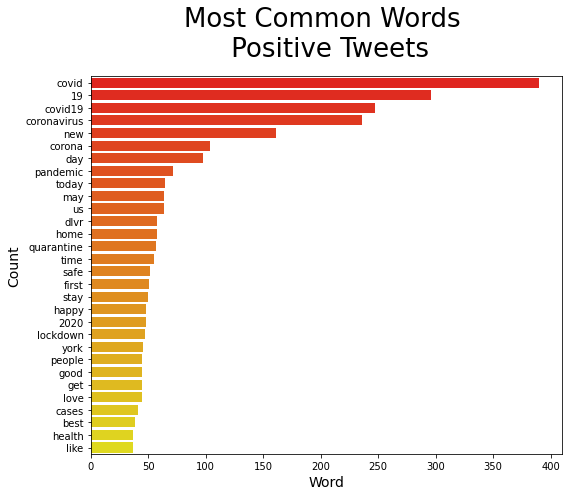

In [91]:
vector_func_single(final_df_pos, 'Most Common Words \n Positive Tweets')

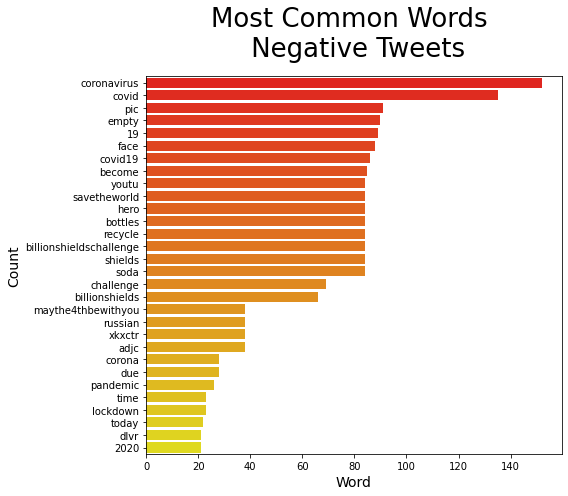

In [92]:
vector_func_single(final_df_neg, 'Most Common Words \n Negative Tweets')

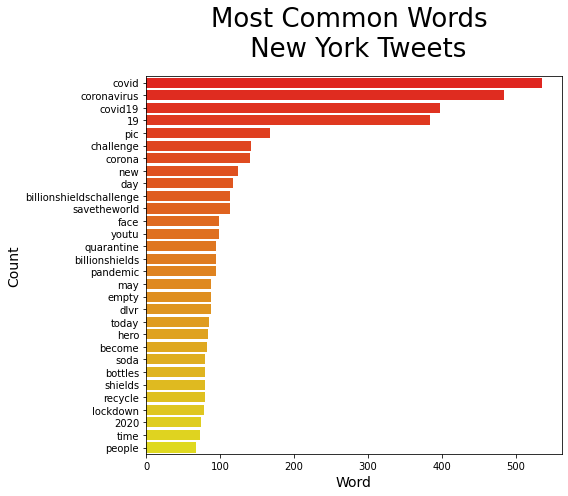

In [93]:
vector_func_single(final_df_ny, 'Most Common Words \n New York Tweets')

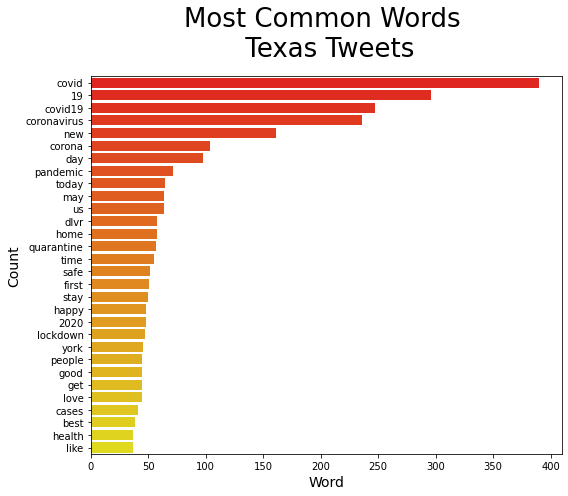

In [95]:
vector_func_single(final_df_pos, 'Most Common Words \n Texas Tweets')

In [96]:
# function to build dataframes for each sub-list that can be combined
def vector_func(df,rank_name):
    cvec = CountVectorizer(lowercase=True, ngram_range = (1,1), stop_words=all_stops) 
    X_text = cvec.fit_transform(df['text'])
    X_text_df = pd.DataFrame(X_text.toarray(), columns=cvec.get_feature_names())
    word_list_func = X_text_df.columns.tolist()
    sum_list_func = [X_text_df[column].sum() for column in X_text_df.columns]
    word_sums = pd.DataFrame()
    word_sums['word'] = word_list_func
    word_sums['sum']  = sum_list_func
    word_sums_30 = word_sums.sort_values('sum', ascending=False).head(30)
    word_sums_30[rank_name] = [n for n in range(1,31)]
    word_sums_30.drop(columns='sum',inplace=True)
    return word_sums_30

In [99]:
# Calling function for each 
df_pos_30 = vector_func(final_df_pos, 'rank_pos')
df_neg_30  = vector_func(final_df_neg, 'rank_neg')
df_ny_30  = vector_func(final_df_ny, 'rank_ny')
df_tx_30 = vector_func(final_df_tx, 'rank_tx')

In [100]:
# Merging files into one dataframe
merge_2 = pd.merge(df_pos_30,df_neg_30,how='outer',on='word')
merge_3 = pd.merge(merge_2,df_ny_30,how='outer',on='word')
merge_final = pd.merge(merge_3,df_tx_30,how='outer',on='word')

merge_final

,word,rank_pos,rank_neg,rank_ny,rank_tx
0,covid,1.0,2.0,1.0,1.0
1,19,2.0,5.0,4.0,3.0
2,covid19,3.0,7.0,3.0,4.0
3,coronavirus,4.0,1.0,2.0,2.0
4,new,5.0,NaN,8.0,6.0
5,corona,6.0,23.0,7.0,5.0
6,day,7.0,NaN,9.0,11.0
7,pandemic,8.0,25.0,16.0,7.0
8,today,9.0,28.0,20.0,12.0
9,may,10.0,NaN,17.0,16.0


Unique words in the lists:
1. In Positive list but not in Negative list
    - safe
    - first
    - stay
1. In Negative list but not in Positive list
    - pic
    - thank
    - staysafe
    - stigma
    - stayhome
    - face
    - covid_19
    - california
    - life
    - help
1. In NY list but not in TX list
    - new
    - day
    - may
    - quarantine
    - people
1. In TX list but not in NY list
    - maythe4thbewithyou
    - russian
    - xkxctr
    - adjc
    - due    
1. Rankings of major variation
    - carona 7 in NY vs 23 in TX
    - pandemic 16 in NY vs 25 in TX
    - challenge 6 in NY vs 17 in TX
    - empty 18 in NY vs 4 in TX
    - hero 21 in NY vs 11 in TX
    - become 22 in NY vs 8 in TX
    - bottles 24 in NY vs 12 in TX
    - shields 25 in NY vs 15 in TX